<a href="https://colab.research.google.com/github/zhenux/mdp_analiz/blob/main/data_tracker_v10_3_16062022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://nav.by/login_get_data.php?type=LOGIN&data%5Blogin%5D=diler_el_vek&data%5Bpwd%5D=111111&data%5BscreenWidth%5D=1920&data%5BscreenHeight%5D=1080
# https://nav.by/login_get_data.php?type=LOGIN&data%5Blogin%5D=elvek&data%5Bpwd%5D=111111&data%5BscreenWidth%5D=1920&data%5BscreenHeight%5D=1080
### postman
import requests

url = "https://nav.by/login_get_data.php?type=LOGIN&data%5Blogin%5D=diler_el_vek&data%5Bpwd%5D=111111&data%5BscreenWidth%5D=1920&data%5BscreenHeight%5D=1080"

payload={}
headers = {
  'Cookie': 'pc_id=60b9bbc0-bef7-4c4b-9052-003672c5d1a9; ses_id=15fb4b00-046b-4e59-bd88-175381dd03b8'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

### postman

url = "https://nav.by/info/testAccel.php?imei=359632102795827&s_dt=2022-06-16%2009:40:00&e_dt=2022-06-16%2010:40:00"

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

In [ ]:
import requests
from bs4 import BeautifulSoup
from google.colab import files

periods = (['&s_dt=2022-06-16%2009:43:00&e_dt=2022-06-16%2010:35:00',
            '&s_dt=2022-06-16%2009:43:00&e_dt=2022-06-16%2010:35:00',
            '&s_dt=2022-06-21%2010:28:00&e_dt=2022-06-21%2012:02:00',
            '&s_dt=2022-06-21%2010:28:00&e_dt=2022-06-21%2012:02:00'])

web_links = (['https://nav.by/info/testAccel.php?imei=359632102795827',
              'https://nav.by/info/testAccel.php?imei=352094089278805',
              'https://nav.by/info/testAccel.php?imei=359632102795827',
              'https://nav.by/info/testAccel.php?imei=352094089278805'])

db_files = (['db_359632102795827_1',
             'db_352094089278805_1',
             'db_359632102795827_2',
             'db_352094089278805_2'])

### postman
import requests

url = "https://nav.by/login_get_data.php?type=LOGIN&data%5Blogin%5D=diler_el_vek&data%5Bpwd%5D=111111&data%5BscreenWidth%5D=1920&data%5BscreenHeight%5D=1080"

payload={}
headers = {
  'Cookie': 'pc_id=60b9bbc0-bef7-4c4b-9052-003672c5d1a9; ses_id=15fb4b00-046b-4e59-bd88-175381dd03b8'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

### postman

NUM_OF_FILES = len(web_links)
for p in range(NUM_OF_FILES):

    file = open(db_files[p] + ".csv", "w")
    file.close()
    
    response = requests.request("GET", web_links[p]+periods[p], headers=headers, data=payload)
    soup = BeautifulSoup(response.text, 'lxml')

    file = open(db_files[p] + ".csv", "a+")

    quotes = soup.find_all('p')
    for quote in quotes:
        file.write(quote.text) 
    file.close()
    
    file = open(db_files[p] + ".csv", "r")
    lines = file.readlines()
    file.close()
    
    f_first_line = 1
    
    file = open(db_files[p] + ".csv", "w")
    for line in lines:
        if f_first_line == 1:
            file.write(line)
            f_first_line = 0
        if ((line != "date;speed;78;64011;64022;64033;64044;delta64011;delta64022;delta64033;delta64044;vodo;lat;lon;dir;alt;engine_speed;distance_gps;201;202;203;204;210;211;212;213;214;215\n") and (line != "\n")):
            file.write(line)        
    file.close()

{"url":".\/info\/help.php","exitCode":0}


In [ ]:
files.download('db_359632102795827.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('db_352094089278805.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import math
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from array import array
sns.set(style="darkgrid")

len(df):871
overrage:283
delta:-18
9338
9356
overrage:527
delta:-15938
27
15965
---
len(df):927
overrage:323
delta:-15
9387
9402
overrage:518
delta:-40
15177
15217
overrage:562
delta:-15967
31
15998
---
len(df):638
overrage:410
delta:-12894
1241
14135
overrage:411
delta:-198
1170
1368
overrage:587
delta:-27
9527
9554
---
len(df):887
overrage:156
delta:-16
4585
4601
overrage:458
delta:-15803
154
15957
overrage:647
delta:-17
7314
7331
overrage:862
delta:-23
12553
12576
---
24668
393
24464
382
24414
95
29070
544


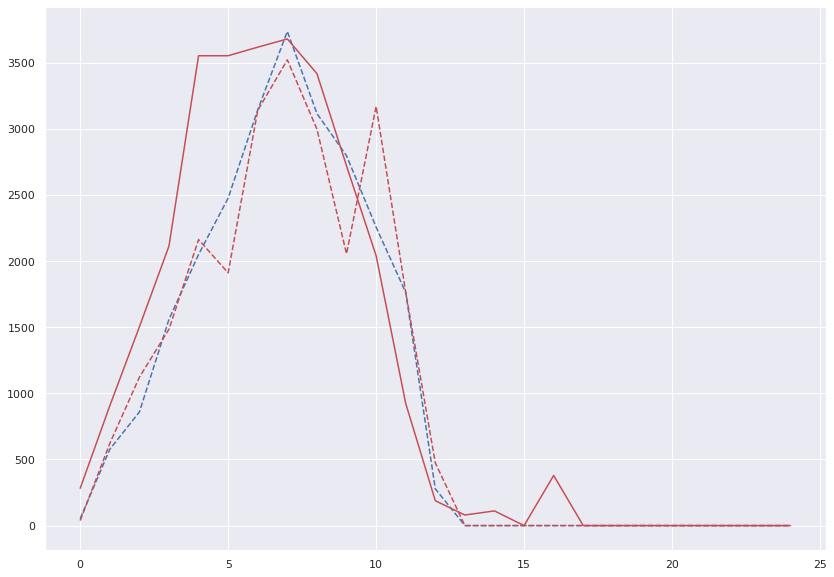

-----


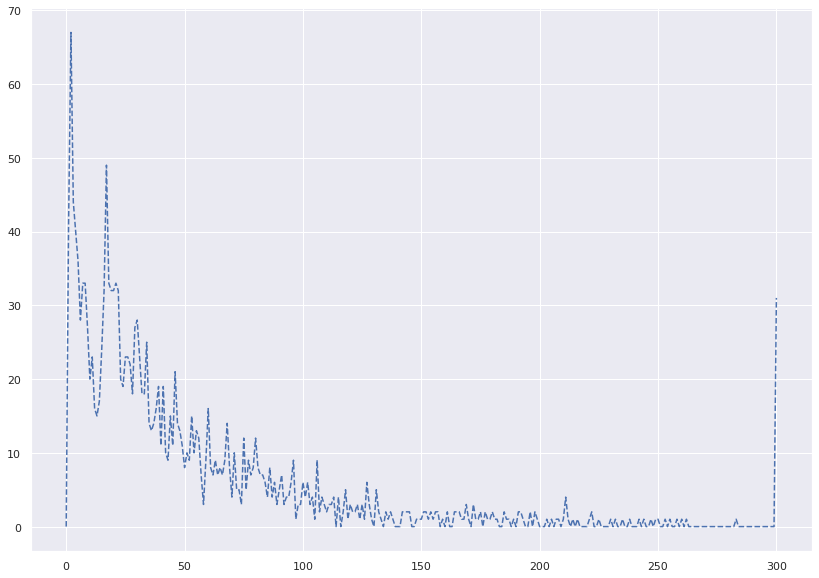

In [ ]:
NUM_OF_FILES = len(db_files)
num_interval_speed = 25
DELTA_ = 300

array_data_acc_turn = [[0] * num_interval_speed for i in range(NUM_OF_FILES)]
delta_statistic = [0]*(DELTA_+1)

num_points = [0]*NUM_OF_FILES

for p in range(NUM_OF_FILES):
  df = pd.read_csv(db_files[p] + '.csv', sep = ';', engine ='python', decimal = ',')
  df.columns = ['date', 'speed', 'rowdata', 'z', 'y', 'x_m', 'x_p', 'delta64011', 'delta64022', 'delta64033', 'delta64044', 'vodo', 'lat', 'lon', 'dir', 'alt', 'engine_speed', 'distance_gps', 'mark_score1', 'mark_ind1', 'mark_score2', 'mark_ind2', 'mark_score3', 'mark_ind3', 'mark_score4', 'mark_ind4', 'mark_score5', 'mark_ind5']

  message_prev = [0,0,0,0,0,0,0,0,0,0]

  last_val_x = 0

  print('len(df):' + str(len(df)))

  for i in range(1, len(df)):
    message = [df.mark_score1[i], df.mark_ind1[i], df.mark_score2[i], df.mark_ind2[i], df.mark_score3[i], df.mark_ind3[i], df.mark_score4[i], df.mark_ind4[i], df.mark_score5[i], df.mark_ind5[i]]
    
    new_messages_val_x = []
    new_messages_ind_x = []
    
    vals_x = []
    vals_x.append(last_val_x)

    first_new_val_x = 0
    
    for u in range(0, 10, 2):
      if (message_prev[u] != message[u]) or (message_prev[u+1] != message[u+1]):
        if (message[u+1] >= 25) and (message[u+1] <= 49): # 0..24; 25..49; 50..74
          vals_x.append(message[u])
          new_messages_val_x.append(message[u])
          new_messages_ind_x.append(message[u+1])
    if(len(new_messages_val_x) >= 1):
      sorted_arr = sorted(vals_x)
      if (sorted_arr.index(last_val_x) < (len(sorted_arr) - 1)):
        first_new_val_x = sorted_arr[sorted_arr.index(last_val_x) + 1]
      else:
        first_new_val_x = sorted_arr[0]
      index_start = new_messages_val_x.index(first_new_val_x)
      for k in range(len(new_messages_val_x)):    
        delta = new_messages_val_x[(index_start + k)%len(new_messages_val_x)] - last_val_x
        if delta > 0.0:
          if delta > 10:
            array_data_acc_turn[p][(new_messages_ind_x[(index_start + k)%len(new_messages_val_x)])%25] += delta
            num_points[p] += 1
          if delta < DELTA_:
            delta_statistic[delta] += 1
          else:
            delta_statistic[DELTA_] += 1
        else:
          print("overrage:" + str(i))
          print("delta:" + str(delta))
          print(new_messages_val_x[(index_start + k)%len(new_messages_val_x)])
          print(last_val_x)
        last_val_x = new_messages_val_x[(index_start + k)%len(new_messages_val_x)]
    
    for t in range(len(message_prev)):
      message_prev[t] = message[t]
  print('---')  
sum_scores = [0]*NUM_OF_FILES
for m in range(NUM_OF_FILES):
  for d in range(num_interval_speed):
    sum_scores[m] += array_data_acc_turn[m][d]
  print(sum_scores[m])
  print(num_points[m])

plt.figure(figsize=(14,10))
plt.plot(array_data_acc_turn[0], 'b--')
plt.plot(array_data_acc_turn[1], 'r--')
#plt.plot(array_data_acc_turn[2], 'b')
plt.plot(array_data_acc_turn[3], 'r')
plt.show()
print("-----")
plt.figure(figsize=(14,10))
plt.plot(delta_statistic, 'b--')
plt.show()


# Новый раздел